In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

### Reading the Telecom-Churn.csv file

In [2]:
tc=pd.read_csv("C:\\Users\\Vivek Nag Kanuri\\Downloads\\telecom-churn - telecom-churn.csv")

In [3]:
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# shape of the csv file 
tc.shape

(7043, 21)

In [5]:
# size of the csv file
tc.size

147903

In [6]:
tc.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


### Features - Data Types 

In [7]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Knowing about Null values 
#### NOTE: As you see in the above cell all the features are cleaned, but only the Total Charges Column has Null values.

In [8]:
tc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### While predicting , Data Cleaning is very important. The dataset is to be cleaned.
#### The cleaning process for the null values in Total Charges column is as follows :
####    Instead of Removing The Null Values in Total Charges column ,I filled those Null values with median value .

In [9]:
tc['TotalCharges']=tc['TotalCharges'].fillna(tc['TotalCharges'].median())

In [10]:
tc['TotalCharges'].isnull().sum()

# See in the above cells we filled the null values with median value 
# so that there are no null values in the TotalCharges column

0

### Finding Unique values in each column

In [11]:
col=['gender','MultipleLines','InternetService','Contract','PaymentMethod']
# Remaining columns are having values like 'yes' and 'no'
for i in col:
    print(i)
    print(tc[i].unique())
    print(tc[i].nunique())
    print()

gender
['Female' 'Male']
2

MultipleLines
['No phone service' 'No' 'Yes']
3

InternetService
['DSL' 'Fiber optic' 'No']
3

Contract
['Month-to-month' 'One year' 'Two year']
3

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
4



### In the MultipleLines column there are data errors such as 
#### there are 3 unique columns like 'yes', 'no' ,'no phone service' ,but the values  is nothing but the value 'No'.
#### so we've to replace 'no phone service' as 'no'.

In [12]:
tc['MultipleLines']=tc['MultipleLines'].replace(['No phone service'],'No')

In [13]:
tc['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

#### hence the data errors are corrected

In [14]:
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# Correlation of this data is given by:

tc.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


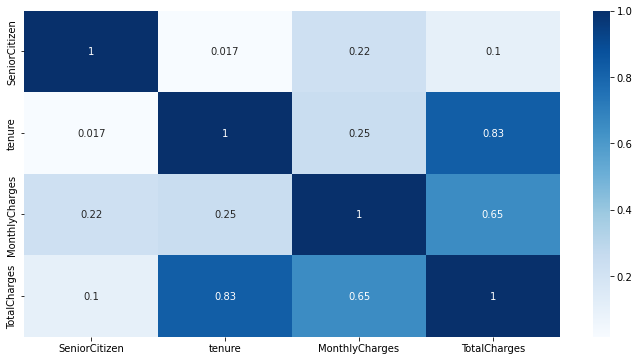

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(tc.corr(),annot=True,cmap='Blues')
plt.show()

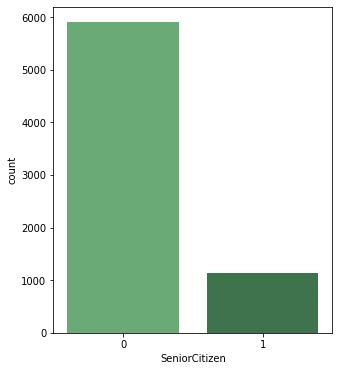

In [17]:
plt.figure(figsize=(5,6))
sns.countplot(x='SeniorCitizen',data=tc,palette='Greens_d')
plt.show()

#### The above count plot tells about how many senior citizens are there .And there are less senior citizens.

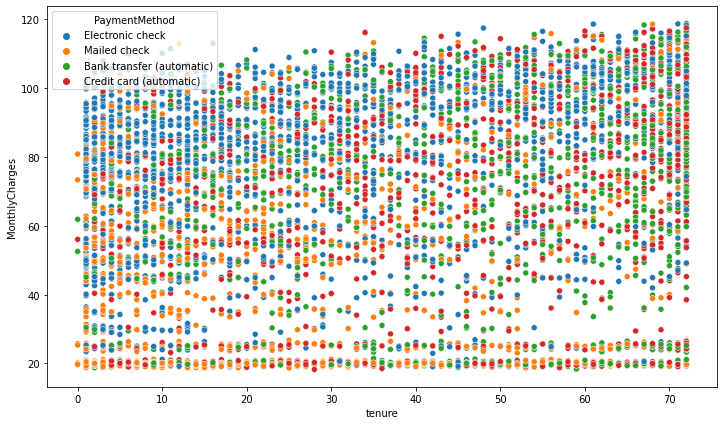

In [18]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='tenure',y='MonthlyCharges',data=tc,hue='PaymentMethod')
plt.show()

#### The above scatterplot shows Monthly Charges vs Tenure among various types of Payment Methods.

In [19]:
px.scatter(tc,tc.MonthlyCharges,tc.TotalCharges,color='PaymentMethod',size='tenure')

#### The above plot shows how Monthly Charges and Total Charges are varied in according to the Payment Method.

In [20]:
px.histogram(tc,tc.MonthlyCharges,color='Churn')

#### The above graph explains how Churn varies in according to Monthly Charges

In [21]:
px.box(tc,tc.PaymentMethod,tc.TotalCharges,color='PaymentMethod')

#### The above graph tells how Total Charges varies in according to Payment Method

### Prediction :-
#### data preparation:

In [22]:
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
tc.drop('customerID',axis=1,inplace=True)

In [24]:
tc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
tc.drop('Partner',axis=1,inplace=True)
tc.drop('Dependents',axis=1,inplace=True)
tc.drop('StreamingMovies',axis=1,inplace=True)
tc.drop('StreamingTV',axis=1,inplace=True)
tc.drop('PaperlessBilling',axis=1,inplace=True)
tc.drop('SeniorCitizen',axis=1,inplace=True)

#### Removing of unwanted columns.

In [26]:
tc.head()

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,No,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,34,Yes,No,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,1889.50,No
2,Male,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,45,No,No,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


### Using Label Encoder to transform categorical values 

In [27]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for col in tc.columns:
    if tc[col].dtype=='object':
        tc[col]=l.fit_transform(tc[col])

In [28]:
tc.head()

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,0,2,0,0,0,2,29.85,29.85,0
1,1,34,1,0,0,2,0,2,0,1,3,56.95,1889.50,0
2,1,2,1,0,0,2,2,0,0,0,3,53.85,108.15,1
3,1,45,0,0,0,2,0,2,2,1,0,42.30,1840.75,0
4,0,2,1,0,1,0,0,0,0,0,2,70.70,151.65,1


### Splitting data for training and testing :

In [29]:
x=tc.drop('Churn',axis=1)
y=tc['Churn']

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [31]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
xtrain=mms.fit_transform(xtrain)
xtest=mms.fit_transform(xtest)
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)

In [32]:
Res={'Model':[],'Accuracy':[],'Recall':[],'Precision':[],'F1':[]}

In [33]:
Results=pd.DataFrame(Res)
Results.head()

,Model,Accuracy,Recall,Precision,F1


### Importing Machine Learning Algorithms  :

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 

lr=LogisticRegression()
dc=DecisionTreeClassifier()
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
gnb=GaussianNB()

model=[lr,dc,rf,et,knn,svm,gnb]

for models in model:
    models.fit(xtrain,ytrain)
    
    ypred=models.predict(xtest)
    
    
    print('Model :',models)
    print('-----------------------------------------------------------------------------------------------------------------------')
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
    
    print('confusion matrix :',confusion_matrix(ytest,ypred))
    print('classification report:',classification_report(ytest,ypred))
    print('accuracy :',round(accuracy_score(ytest,ypred),2))
    print('precision :',round(precision_score(ytest,ypred),2))
    print('recall :',round(recall_score(ytest,ypred),2))
    print('f1 :',round(f1_score(ytest,ypred),2))
    print()
    R={'Model':models,
             'Accuracy':round(accuracy_score(ytest,ypred),2),
             'Recall':round(recall_score(ytest,ypred),2),
             'Precision':round(precision_score(ytest,ypred),2),
             'F1':round(f1_score(ytest,ypred),2)
            }
    Results=Results.append(R,ignore_index=True)

Model : LogisticRegression()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[1384  155]
 [ 252  322]]
classification report:               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.56      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

accuracy : 0.81
precision : 0.68
recall : 0.56
f1 : 0.61

Model : DecisionTreeClassifier()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[1250  289]
 [ 294  280]]
classification report:               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1539
           1       0.49      0.49      0.49       574

    accurac

In [35]:
Results

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression(),0.81,0.56,0.68,0.61
1,DecisionTreeClassifier(),0.72,0.49,0.49,0.49
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.79,0.48,0.65,0.55
3,"(ExtraTreeClassifier(random_state=1893886012),...",0.78,0.49,0.61,0.55
4,KNeighborsClassifier(),0.77,0.53,0.59,0.56
5,SVC(),0.80,0.49,0.67,0.56
6,GaussianNB(),0.76,0.76,0.54,0.63


### The above are the Results of Various Models 

### Logistic Regression got High Accuracy with 81%
### Support vector machine got 2nd highest accuracy with 80%